<a href="https://colab.research.google.com/github/jolurf/Coursera/blob/main/Monte%20Carlo/monte_carlo_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo
## Simulating Coffee Shop

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
name = os.listdir()[1]
import numpy as np
import scipy
from scipy.stats import norm
from scipy.special import ndtri


def plot_info(avg,sd,n_exp):
  samples = np.random.normal(avg, sd, n_exp)

# Plot Gaussian distribution
  plt.figure(figsize=(10, 6))
  count, bins, ignored = plt.hist(samples, 30, density=True, alpha=0.6, color='g')

  # Plotting the Gaussian curve
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = scipy.stats.norm.pdf(x, avg, sd)
  plt.plot(x, p, 'k', linewidth=2)

  # Highlighting the region outside the confidence interval
  plt.fill_between(x, p, where=(x > avg + t_alpha * sd) | (x < avg - t_alpha * sd), color='red', alpha=0.3)
  plt.axvline(avg + t_alpha*sd,c='r')
  plt.axvline(avg - t_alpha*sd,c='r')
  plt.title('Gaussian Distribution with Highlighted Region Outside Confidence Interval')
  plt.xlabel('Customer Information')
  plt.ylabel('Probability Density')
  plt.show()


# Arrival of Customers
**Avaiable data** <br>
min:300<br>
max:500 <br>
more concentrated on middle (bell shaped) <br>
daily revenue: 2050 <br>
maximum: 2400 <br>

Suppose minimum and maximum value represent 0.5% of the distribution, hence, due to simmetry:<br>
$mean = \frac{min+max}{2}$<br>
$ sd = \frac{(mean - min)}{t_{1-\alpha/2}}$

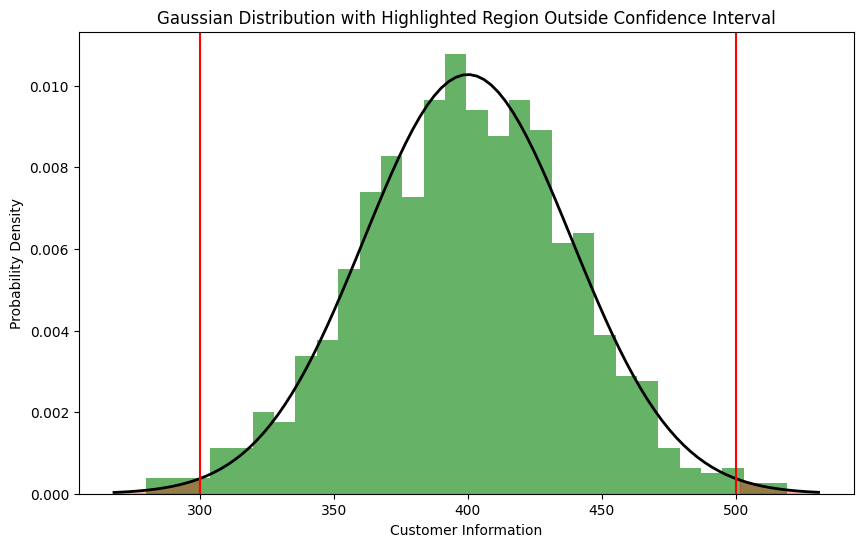

In [ ]:
n_exp = 1000 #number of simulations
# c stand for customer information
c_min = 300
c_max = 500
c_avg = np.mean([c_min,c_max])
c_alpha = 0.005
t_alpha = scipy.stats.norm.ppf(1-c_alpha)
c_sd = (c_avg - c_min)/t_alpha

plot_info(c_avg,c_sd,n_exp)

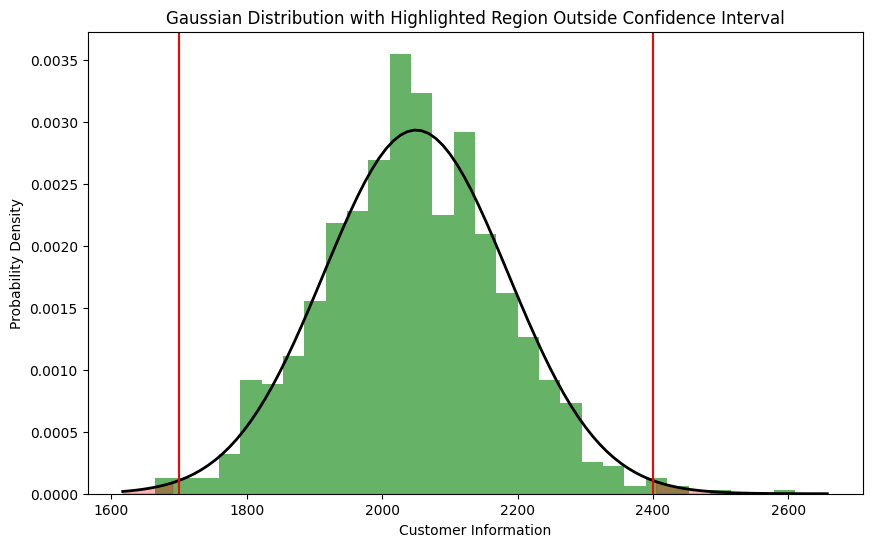

In [ ]:
r_max = 2400
r_avg = 2050
r_min = 2*r_avg - r_max
r_alpha = .005
rt_alpha = scipy.stats.norm.ppf(1-r_alpha)
r_sd = (r_max-r_avg)/rt_alpha
plot_info(r_avg,r_sd,n_exp)

We will estimate that per_capta expense is the average revenue divided by the average number of customers.

In [ ]:
per_capta= r_avg/c_avg

Proposed model: <br>
In the course, it was proposed to estimate the distributions according to the formula below, where F represents the cumulative distribution function for the distribution.<br>
Besides, U[0,1] represents a variable sampled according to the uniform distribution on [0,1] interval<br>
$X \sim F^{-1}(U[0,1])$ <br>
Ref: https://colab.research.google.com/drive/1-E22uYffx576TcZ8npxYanB2hawttLVc?usp=sharing
<br>
Note: ndrti is $\Phi^{-1}(X)$, the inverse of the gaussian cumulative distribution function, here it is $F^{-1}$.

# Model 1

For the first model, we will assume that the per_capta revenue is constant, given by average_expense/average_customers.

In [ ]:
uniform = np.random.rand(n_exp)
cust_sim = np.rint(c_avg + c_sd*ndtri(uniform)).astype(np.int16) #first simulation, we will use its formula, which is to round to integer the number of
rev_sim_fix = np.round(cust_sim*per_capta,2)
# cust_sim

In [ ]:
df = pd.DataFrame({"percentile":np.arange(0.05,1,.05),"Revenue_fixed":np.percentile(rev_sim_fix, 100*np.arange(0.05,1,0.05))})


(array([  8.,  44., 146., 266., 279., 170.,  68.,  14.,   5.]),
 array([1435.        , 1581.91666667, 1728.83333333, 1875.75      ,
        2022.66666667, 2169.58333333, 2316.5       , 2463.41666667,
        2610.33333333, 2757.25      ]),
 <BarContainer object of 9 artists>)

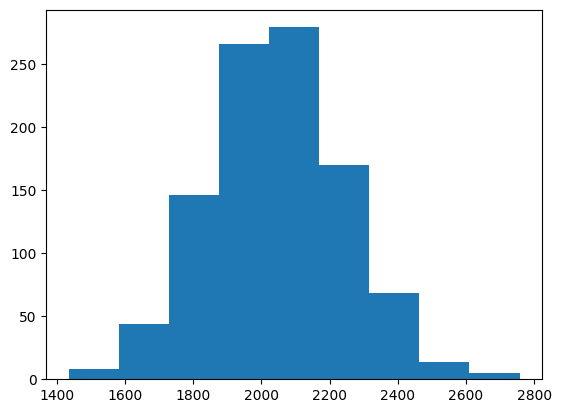

In [ ]:
range_ =np.arange(1700,2600,100)
freq,bins = np.histogram(rev_sim_fix,bins=9,range=(1700,2600))
cumulative = np.cumsum(freq)/100
df_ = pd.DataFrame({'freq':freq,'bins':bins[:-1],'cumulative':cumulative})
df_
plt.hist(rev_sim_fix,bins=9)

# Model 2
Simulate revenue directly and independently!<br>
According to:<br>
$Revenue \sim \mathcal{N}(mean_{revenue}, sd_{revenue} ^2)$

(array([ 13.,  64., 205., 252., 245., 132.,  49.,  27.,  10.,   3.]),
 array([3.56673114, 3.98077231, 4.39481348, 4.80885466, 5.22289583,
        5.636937  , 6.05097817, 6.46501934, 6.87906051, 7.29310169,
        7.70714286]),
 <BarContainer object of 10 artists>)

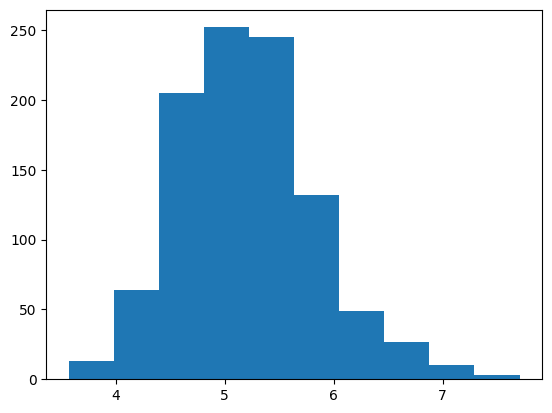

In [ ]:
r_uniform = np.random.rand(n_exp)
rev_sim = np.round(np.rint(r_avg + r_sd*ndtri(r_uniform)),6)
per_capta = rev_sim/cust_sim
plt.hist(per_capta)

In [ ]:
mean_pc = np.mean(per_capta)
sd_pc = np.std(per_capta)

Compare fixed to simulated model

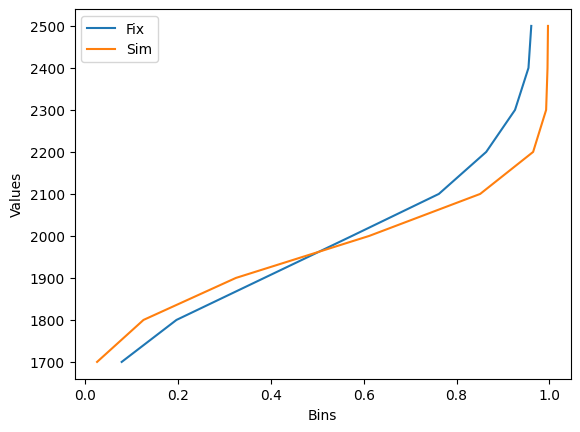

,bins,freq_fix,freq_sim,cumulative_fix,cumulative_sim
0,1700.0,79,26,0.079,0.026
1,1800.0,118,100,0.197,0.126
2,1900.0,189,199,0.386,0.325
3,2000.0,189,287,0.575,0.612
4,2100.0,187,239,0.762,0.851
5,2200.0,102,114,0.864,0.965
6,2300.0,62,28,0.926,0.993
7,2400.0,29,3,0.955,0.996
8,2500.0,6,1,0.961,0.997


In [ ]:
range_ =np.arange(1700,2600,100)
freq_fix,bins = np.histogram(rev_sim_fix,bins=9,range=(1700,2600))
cumulative_fix = np.cumsum(freq_fix)/n_exp
freq,_ = np.histogram(rev_sim,bins=9,range=(1700,2600))
cumulative = np.cumsum(freq)/n_exp
df_ = pd.DataFrame({'bins':bins[:-1],'freq_fix':freq_fix,'freq_sim':freq,'cumulative_fix':cumulative_fix,'cumulative_sim':cumulative})
plt.plot( df_['cumulative_fix'],df_['bins'], label='Fix')
plt.plot( df_['cumulative_sim'],df_['bins'], label='Sim')
plt.xlabel('Bins')
plt.ylabel('Values')
plt.legend()
plt.show()
df_


# Model 3
Predict monthly income by simulating daily income and summing them.


In [ ]:
n_days = 30
days_income = r_avg + r_sd*np.random.randn(n_days)
month_income = np.sum(days_income)


For multiple simulations at a time

In [ ]:
n_iterations = 1000
month_sims = r_avg + r_sd*np.random.randn(n_iterations,n_days)
month_sims_rev = np.sum(month_sims,axis=-1)
min_income = np.min(month_sims_rev)
max_income = np.max(month_sims_rev)


In [ ]:
month_percentiles = np.percentile(month_sims_rev,100*np.arange(0,1.05,0.05))
df_percentile = pd.DataFrame({'percentile':100*np.arange(0,1.05,0.05),'income':month_percentiles})
df_percentile

,percentile,income
0,0.0,58834.218121
1,5.0,60209.296596
2,10.0,60541.370456
3,15.0,60712.384081
4,20.0,60864.714361
5,25.0,60977.436553
6,30.0,61088.906059
7,35.0,61179.921170
8,40.0,61285.785349
9,45.0,61381.495736


# Model 4
Get number of customers according to the distribution above.<br>
Guessing the expense of each customer using a simulation of average expense. <br>
Sum it and get the revenue for that day.<br>
Mathematically, one can write that as:<br>
$$C \sim round(N(\mu_{c},\sigma^2_{c}))$$
$$E_i \overset{iid}{\sim} \mathcal{N}(\mu_{capta},\sigma^2_{capta})$$
$$R \sim \sum_{i=1}^{C}E_i$$

In [ ]:
# note that here you can use your simulated number of customers
n_sim = 1000

def simulate_customer(c_avg,c_sd,n_sim=1):
   return (c_avg + c_sd*np.random.randn(n_sim)).astype(np.int16)

n_customers = simulate_customer(c_avg,c_sd,n_sim)

expenses = np.array([np.sum(mean_pc + sd_pc*np.random.randn(i)) for i in n_customers])
#for each day, we simulate the mean expense of each of the i customers
daily_percentiles = np.percentile(expenses,100*np.arange(0,1.05,0.05))

df_daily = pd.DataFrame({'percentile':100*np.arange(0,1.05,0.05),'daily':daily_percentiles})
# df_daily

# Compare models 1,2 and 4 for daily income

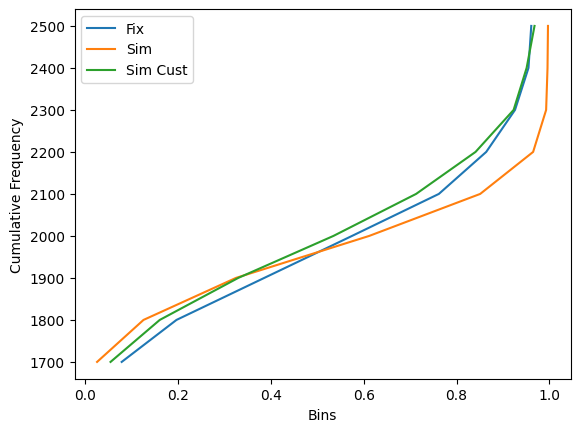

In [ ]:
freq_sim,_ = np.histogram(expenses,bins=9,range=(1700,2600))
cumulative_sim = np.cumsum(freq_sim)/n_sim
df_ = pd.DataFrame({'bins':bins[:-1],'freq_fix':freq_fix,'freq_sim':freq,'freq_sim_cust':freq_sim,'cumulative_fix':cumulative_fix,'cumulative_sim':cumulative,'cumulative_sim_cust':cumulative_sim})

plt.plot( df_['cumulative_fix'],df_['bins'], label='Fix')
plt.plot( df_['cumulative_sim'],df_['bins'], label='Sim')
plt.plot( df_['cumulative_sim_cust'],df_['bins'], label='Sim Cust')
plt.xlabel('Bins')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()

# Conterfactual Analysis

In [ ]:
# Consider the cheapest item of the store
min_t = 1.75
mean_t = 5.125
r_alpha = .005 #create 99% interval
rt_alpha = scipy.stats.norm.ppf(1-r_alpha)
max_t = 2*mean_t - min_t
sd_t = (mean_t-min_t)/rt_alpha

## Do model 4 over
Data triangulation involves:

 Using multiple approaches to
validate the estimates used in the simulation models


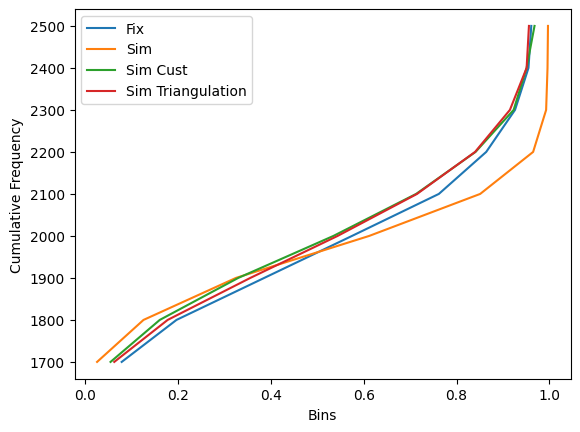

In [ ]:
n_sim = 1000

n_customers = simulate_customer(c_avg,c_sd,n_sim)

def simulate_income_n(mean_t, sd_t, n):
   return np.array(np.sum(mean_t + sd_t*np.random.randn(n)))

def simulate_income(mean_t,sd_t,n_customers):
    return np.array([simulate_income_n(mean_t,sd_t,n) for n in n_customers])

income = simulate_income(mean_t, sd_t, n_customers)
#for each day, we simulate the mean expense of each of the i customers
# daily_percentiles_5 = np.percentile(income,100*np.arange(0,1.05,0.05))

freq_sim_5,_ = np.histogram(income,bins=9,range=(1700,2600))
cumulative_sim_5 = np.cumsum(freq_sim_5)/n_sim
df_ = pd.DataFrame({'bins':bins[:-1],'freq_fix':freq_fix,'freq_sim':freq,'freq_sim_cust':freq_sim,'freq_sim_cust_triang':freq_sim,'cumulative_fix':cumulative_fix,'cumulative_sim':cumulative,'cumulative_sim_cust':cumulative_sim,'cumulative_sim_triang':cumulative_sim_5})

plt.plot( df_['cumulative_fix'],df_['bins'], label='Fix')
plt.plot( df_['cumulative_sim'],df_['bins'], label='Sim')
plt.plot( df_['cumulative_sim_cust'],df_['bins'], label='Sim Cust')
plt.plot( df_['cumulative_sim_triang'],df_['bins'], label='Sim Triangulation')

plt.xlabel('Bins')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()

Model 1 - good enough for daily revenue prediction, despite being the simplest.
It cannot estimate revenue distribution for a given number of customers on a given day.
Aggregate model provides conservative.
Triangulated models can provide flexibility; post-model development


# Coffee Shop Weather
However, from real life, it is observed that on raining days, the minimum amount spent is U\$4.00 <br>
Suppose that 20% of the time, the weather will be rainy.<br>
Suppose that in a rainy day, the max number of customers is 400.<br>
Suppose that in a regular day, the mean spent is 5.125 and sd is 1.31.

In [ ]:
min_weather = 4
weather_affected = 0.2
max_customers = 400
mean_spent = 5.125
sd_spent = 1.31


Let mean be $\mu$, let sd be $\sigma$.

For the sake of clarity, let $\beta = cdf(U\$4.00)$, in other words, what's the probability of a customer spending $\leq$ U\$4.00.<br><br>
To solve this, we are using the formula for simulation $F^{-1}(U)$, where U comes from an uniform distribution. However, we want $U \in [\beta,1]$, because the maximum cdf is 1 and the minimum value we want our final gaussian to represent is 4.
<br>
So, we will proceed to simulate a conditioned standard gaussian variable Z, such that $ Z\geq \frac{4-\mu}{\sigma}$.<br>
Then, we multiply the simulation by $\sigma$ and sum $\mu$. So that we have R $\geq 4$ and keep the properties.
<br> <br>

We want a variable according to $ U \sim \mathcal{U}[\beta,1]$.<br>
Write it as $\hat{U} \sim \beta + (1-\beta)\tilde{U}$, where $\tilde{U} \sim \mathcal{U}[0,1]$.<br>
$\hat{Z} \sim \Phi^{-1}(\hat{U})$ is the standard gaussian equivalent described above.<br>
Now, back to the previous case:<br>
$\hat{R} \sim \mu + \sigma\hat{Z}$


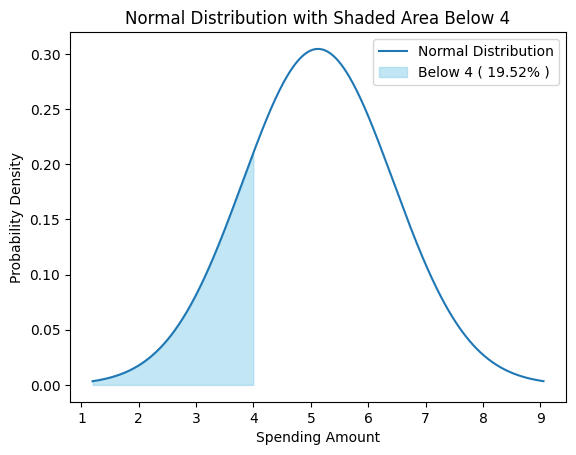

In [ ]:
z_score = (min_weather - mean_spent) / sd_spent

# Calculate the percentage of the distribution below min_weather
percentage_below_min_weather = norm.cdf(min_weather, mean_spent, sd_spent) * 100

# Generate data for the normal distribution
x = np.linspace(mean_spent - 3 * sd_spent, mean_spent + 3 * sd_spent, 1000)
y = norm.pdf(x, mean_spent, sd_spent)

# Plot the normal distribution
plt.plot(x, y, label='Normal Distribution')

# Shade the area below min_weather
plt.fill_between(x, y, where=(x <= min_weather), color='skyblue', alpha=0.5, label=f'Below {min_weather} ( {percentage_below_min_weather:.2f}% )')

# Add labels and legend
plt.title(f'Normal Distribution with Shaded Area Below {min_weather}')
plt.xlabel('Spending Amount')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

In [ ]:
#cumulative distribution for minimum
def simulate_rain(min_weather,mean_spent,sd_spent,n_sim):
    z_score = (min_weather-mean_spent)/sd_spent
    min_proba = norm.cdf(z_score)
    max_proba = 1 - norm.cdf(z_score)

    simulations = min_proba + (max_proba)*np.random.rand(n_sim)#simulate a variable according to U[0,1]

    ##now we have values from possible values, now transform them into standard normal
    standard_normal = norm.ppf(simulations) #convert cdf to ppf of standard normal
    ## now from sd_normal to our case
    rain_expense_customer = mean_spent + standard_normal*sd_spent
    return rain_expense_customer

def simulate_income_rain(mean_spent,sd_spent,n,min_weather):
    return np.array([np.sum(simulate_rain(min_weather,mean_spent,sd_spent,n))])

As the maximum amount of customers in a rainy day was 400, then we divide the probability of a given given that had less than 400 people to be rainy.<br>


Note that if it has less than max_customers it does not necessarily mean that it was a rainy day.
Given the number of customers, to get if it was rainy, we want to calculate the probability of rainy given the number of customers <= max_customers.<br>
Using Bayes Theorem:
$$\mathcal{P(rainy| \leq max)} = P(\leq max|rainy)P(rainy)/P(\leq max)$$
However, $P(\leq max|rainy) = 1$, so we have:
$$\mathcal{P(rainy| \leq max)} = \frac{P(rainy_{prior})}{P(\leq max)}$$
But $P(\leq max)= cdf((max - c_{avg})/c_{sd})$.<br>
Note that a probability cannot be greater than 1, so, we transform it to 1 if the value above is >=1.



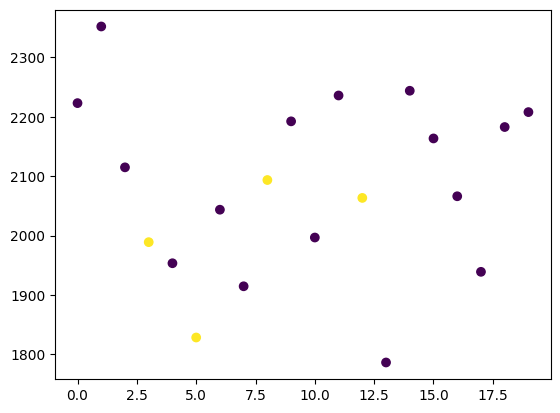

In [ ]:
n_days = 20

cust_sim = simulate_customer(c_avg,c_sd,n_days)

def get_weather(weather_affected,max_customers,c_avg,c_sd,n_days,cust_sim):
    proba = min(1,weather_affected/norm.cdf((max_customers - c_avg)/c_sd))
    rain = np.zeros(n_days)
    rain[cust_sim<=max_customers] = (np.random.rand(sum(cust_sim<=max_customers))<= proba).astype(np.int0)
    return rain

# def model5():
#   return np.hstack()

# def model6():
    # return np.hstack([simulate_income_n(mean_t, sd_t,cust_sim[i]) if rain[i]==0 else simulate_income_rain(mean_spent,sd_spent,cust_sim[i],min_weather) for i in range(len(rain))])

rain = get_weather(weather_affected,max_customers,c_avg,c_sd,n_days,cust_sim)
income = np.hstack([simulate_income_n(mean_t, sd_t,cust_sim[i]) if rain[i]==0 else simulate_income_rain(mean_spent,sd_spent,cust_sim[i],min_weather) for i in range(len(rain))])


df_rain = pd.DataFrame({'rain':rain,'income':income})
plt.scatter(y=df_rain["income"],x=np.arange(n_days),c=df_rain['rain'])

# Counterfactual Analysis

Situations that you do not have data on. <br>
Find out what would happen in such scenario.<br>
People tend to spend more on weather days? According to the simulation we showed, yes. Why?



# Discrete Event Simulation



*   Arrival process
  *   Queue
  *   Waiting process
*   Service Process
  * Processing rate

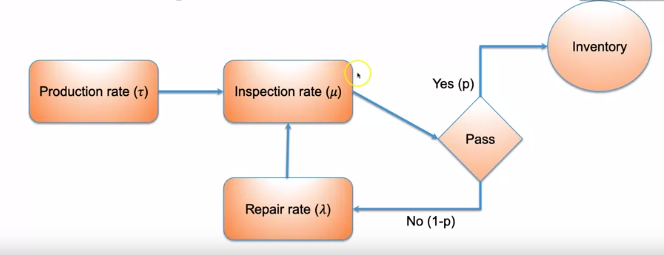


Customer's Arrival
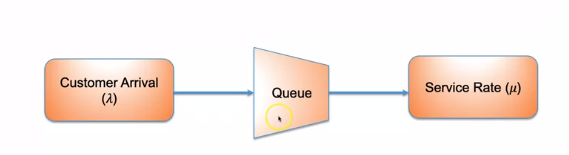




The importance of queues relies on the fact that unpredictability in arrivals can lead to more customers than servers can handle.<br>
The most basic of queue characteristics are usually represented by a tuple A/S/N.<br>
A identifies arrival process, i.e. M for Markovian process where interarrival times of successive events is distribution exponentially; D for deterministics; G for general process.<br>
S identifies service process whose distributions can be defined in a similar manner as arrival processes <br>
N usually represents the number of servers that are available to serve or process events that occur.<br>
<br>
* Discrete event simulation can be modeled with extreme details.
* Outputs can be tested at various levels of aggregation and granularity
<br>
Analyzing an environment that is not part of the observed data is considered counterfactual analysis.

One draws from exponential distribution time.<br>
USing the inverse of cdf:<br>
$cdf(T) = 1-e^{-\lambda T}$<br>
$T = -\frac{ln(1-cdf(T))}{\lambda}$ <br>
As $cdf(T) \sim U(0,1)$, one has:<br>
$T \sim -\frac{ln(1-U)}{\lambda} $

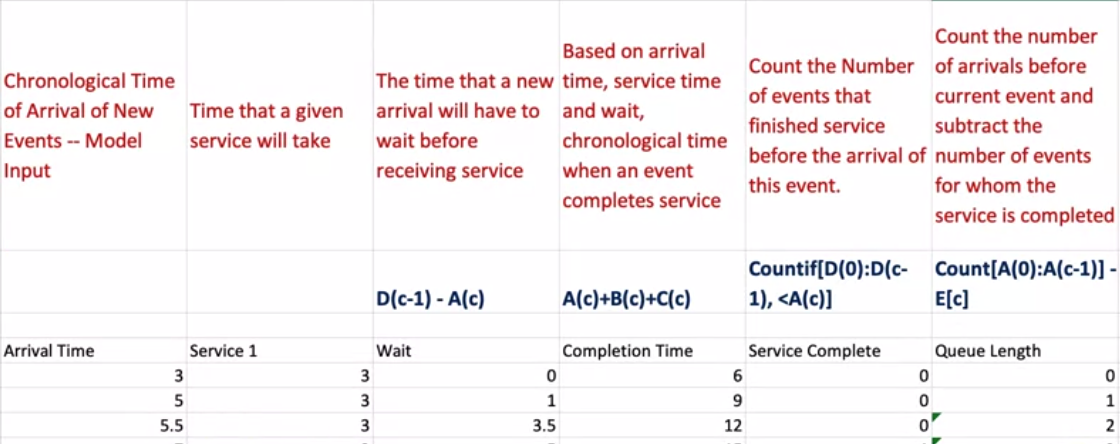

In [ ]:
#people arrive every 3 minutes, so lambda is 1/3

n_sim = 100
param_arrival = 1/3
param_service = 0.4
uniform = np.random.rand(n_sim)
interarrival = -np.log(1-uniform)/param_arrival
service = - np.log(1-np.random.rand(n_sim))/param_service
arrival = np.cumsum(interarrival)

finish0 = arrival[0] + service[0]

def finish_func(arrival,service,finish_prev):
  return arrival + service + (finish_prev-arrival)*(finish_prev>arrival)

finish = [finish0]
for i in range(1,len(arrival)):
  finish += [finish_func(arrival[i],service[i],finish[-1])]

wait = [0]
wait += [(finish[i-1]-arrival[i])*(finish[i-1]>arrival[i]) for i in range(1,len(arrival))]

df = pd.DataFrame({"Arrival":arrival,"Service":service,"InterArrival":interarrival,"Wait":wait,"Completion":finish})
df

,Arrival,Service,InterArrival,Wait,Completion
0,2.103330,0.415332,2.103330,0.000000,2.518662
1,2.286088,2.321855,0.182758,0.232574,4.840517
2,13.634677,2.093125,11.348589,-0.000000,15.727802
3,14.232383,3.084203,0.597706,1.495419,18.812005
4,21.591307,5.879762,7.358924,-0.000000,27.471069
...,...,...,...,...,...
95,303.797779,5.132854,0.780005,2.061105,310.991738
96,316.807933,1.227855,13.010154,-0.000000,318.035788
97,318.358422,4.469612,1.550489,-0.000000,322.828034
98,327.202801,5.140800,8.844379,-0.000000,332.343601


# Creating X/Y/2
2 servers

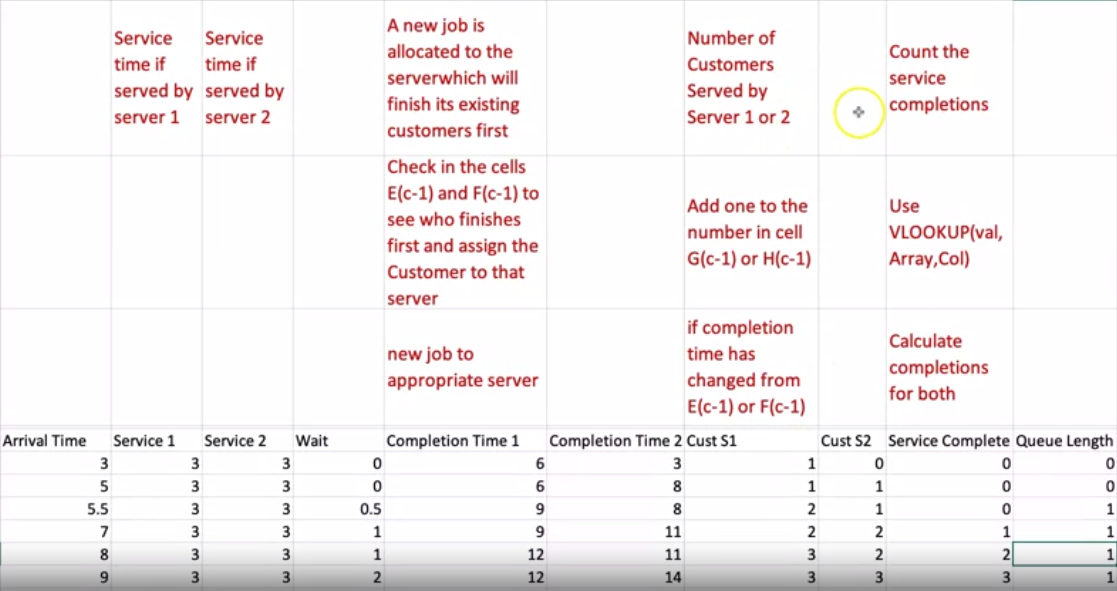

In [ ]:
n_sim = 100
param_arrival = 1/3
param_service1 = 0.4
param_service2 = 0.5
uniform = np.random.rand(2*n_sim)
arrival = np.cumsum(-np.log(1-uniform)/param_arrival)
service1 = - np.log(1-np.random.rand(n_sim))/param_service1
service2 = - np.log(1-np.random.rand(n_sim))/param_service2

arrival = np.cumsum(interarrival)


# pd.DataFrame({"Arrival time":arrival,"Service 1": service1 ,"Service 2":service2,"Complete Time 1":})
# First goes to service 1
completion_time_1 = [arrival[0] + service1[0]]
completion_time_2 = [arrival[1] + service2[0]]

def wait_time(arrival, completion_prev1,completion_prev2):
  return max(0,min(completion_prev1,completion_prev2)-arrival)

In [ ]:

def wait_time(arrival, completion_prev1,completion_prev2):
  return max(0,min(completion_prev1,completion_prev2)-arrival)

def get_completion_time_1(completion_prev1,completion_prev2, service1):
    if completion_prev1 > completion_prev2:
      return completion_prev1
    else:
      return completion_prev1 + service1

def get_completion_time_2(completion_prev1,completion_prev2, service2):
    if completion_prev2 >= completion_prev1:
      return completion_prev2
    else:
      return completion_prev2 + service2

def customers_1(completion_prev1,completion_prev2,customers_prev):
    if completion_prev1 > completion_prev2:
      return customers_prev
    else:
      return customers_prev+1

def customers_2(completion_prev1,completion_prev2,customers_prev):
    if completion_prev2 >= completion_prev1:
      return customers_prev
    else:
      return customers_prev+1


